In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", 100)

In [3]:
comments_path = 'data/comments_-33041211.pkl'
users_path = 'data/users_-33041211.pkl'

In [4]:
with open(comments_path, 'rb') as f:
    comments = pickle.load(f)
with open(users_path, 'rb') as f:
    users = pickle.load(f)

In [5]:
comments_df = pd.DataFrame(comments)

In [6]:
comments_df.head()

,attachments,comment_id,date,from_id,likes,owner_id,reply_to_cid,reply_to_uid,text
0,None,3343742,1481737553,386603734,0,-33041211,None,None,Хе мем
1,None,3343746,1481737608,20955167,0,-33041211,None,None,"вжух, и денег нет"
2,None,3343748,1481737616,95712212,2,-33041211,None,None,Есть мем = можно брать.
3,"[{'type': 'photo', 'photo': {'owner_id': -3304...",3343758,1481737748,400676616,2,-33041211,None,None,
4,None,3343762,1481737815,7272432,0,-33041211,None,None,Месяц назад страховалась. Машина 2008 года ока...


In [7]:
comments_df.from_id.nunique()

138796

In [8]:
comments_df.shape

(2637605, 9)

# Preparing data

In [9]:
def university_cond(user):
    return len(user.get('universities', [])) == 1

In [10]:
def faculty_cond(user):
    return user['universities'][0].get('faculty_name') is not None

In [11]:
users_with_univ = list(filter(university_cond, users))
users_with_fac = list(filter(faculty_cond, users_with_univ))

In [12]:
len(users_with_univ), len(users_with_fac)

(13940, 10657)

In [13]:
users_with_fac[3]

{'activities': '',
 'bdate': '20.5.1991',
 'books': 'Гарри Поттер',
 'can_see_all_posts': 0,
 'can_see_audio': 1,
 'can_write_private_message': 1,
 'first_name': 'Valera',
 'id': 205783200,
 'interests': '',
 'last_name': 'Chaykovsky',
 'movies': 'Гарри Поттер, Люди в чёрном 1, 2, 3',
 'music': 'Почти вся',
 'occupation': {'id': 26032386, 'name': 'Баскетбол', 'type': 'work'},
 'personal': {'alcohol': 2,
  'inspired_by': 'друзья :)',
  'langs': ['Русский',
   'English',
   "Ненэця' вада",
   'Абаза Бызшва',
   'American Sign Language'],
  'life_main': 7,
  'people_main': 6,
  'political': 8,
  'smoking': 1},
 'relation': 6,
 'sex': 2,
 'status': 'Мы так боимся быть навязчивами , что кажемся равнодушными',
 'universities': [{'chair': 1792424,
   'chair_name': 'Управления производством',
   'city': 1,
   'country': 1,
   'faculty': 157891,
   'faculty_name': 'Экономический факультет',
   'graduation': 1996,
   'id': 444,
   'name': 'ВГЛТУ им. Г. Ф. Морозова (бывш. ВГЛТА)'}]}

In [14]:
users_with_fac[0]

{'activities': '',
 'bdate': '19.5',
 'books': '',
 'can_see_all_posts': 0,
 'can_see_audio': 0,
 'can_write_private_message': 1,
 'first_name': 'Maxim',
 'id': 3932177,
 'interests': '',
 'last_name': 'Smirnov',
 'movies': '',
 'music': '',
 'occupation': {'id': 448, 'name': 'Воронежский ГАСУ', 'type': 'university'},
 'personal': {'alcohol': 4,
  'inspired_by': 'Близкие люди',
  'langs': ['Русский', 'English'],
  'life_main': 6,
  'people_main': 2,
  'political': 3,
  'religion': 'Православие',
  'smoking': 4},
 'relation': 1,
 'sex': 2,
 'status': '',
 'universities': [{'chair': 1810781,
   'chair_name': 'Городского строительства и хозяйства',
   'city': 42,
   'country': 1,
   'education_form': 'Full-time',
   'education_status': 'Student (Specialist)',
   'faculty': 2142262,
   'faculty_name': 'Архитектурный',
   'graduation': 2013,
   'id': 448,
   'name': 'Воронежский ГАСУ'}]}

In [15]:
users_ = []
for u in users_with_fac:
    u.pop('occupation', None)
    u.pop('relation_partner', None)
    try:
        univ = u.pop('universities')[0]
    except:
        univ = None
    u.update({'univ_name': univ['name'], 'faculty_name': univ['faculty_name'],
              'education_form': univ.get('education_form'), 'education_status': univ.get('education_status'),
              'graduation': univ.get('graduation')})
    
    pers = u.pop('personal', None)
    if pers:
        u.update({'political': pers.get('political'), 'langs': ','.join(pers.get('langs', [])),
                  'religion': pers.get('religion'), 'inspired_by': pers.get('inspired_by'),
                  'people_main': pers.get('people_main'), 'life_main': pers.get('life_main'),
                  'smoking': pers.get('smoking'), 'alcohol': pers.get('alcohol')})
    users_.append(u)

In [16]:
users_[0]

{'activities': '',
 'alcohol': 4,
 'bdate': '19.5',
 'books': '',
 'can_see_all_posts': 0,
 'can_see_audio': 0,
 'can_write_private_message': 1,
 'education_form': 'Full-time',
 'education_status': 'Student (Specialist)',
 'faculty_name': 'Архитектурный',
 'first_name': 'Maxim',
 'graduation': 2013,
 'id': 3932177,
 'inspired_by': 'Близкие люди',
 'interests': '',
 'langs': 'Русский,English',
 'last_name': 'Smirnov',
 'life_main': 6,
 'movies': '',
 'music': '',
 'people_main': 2,
 'political': 3,
 'relation': 1,
 'religion': 'Православие',
 'sex': 2,
 'smoking': 4,
 'status': '',
 'univ_name': 'Воронежский ГАСУ'}

In [17]:
users_df = pd.DataFrame(users_)

In [17]:
with open('meta_data/vrn_fac.txt', 'w') as f:
    f.writelines('\n'.join(users_df.faculty_name.value_counts()[(users_df.faculty_name.value_counts() > 4)].keys().values))

In [23]:
(users_df.faculty_name.value_counts() > 4).sum()

150

In [25]:
users_df.faculty_name.value_counts()[(users_df.faculty_name.value_counts() > 4)].values.sum()

9334

In [18]:
ing, gum = [], []
with open('meta_data/vrn_fac_.txt', 'r') as f:
    for line in f.readlines():
        if len(line) > 1:
            line = line.strip()
            if line[-1] == '0':
                ing.append(line[:-2])
            elif line[-1] == '1':
                gum.append(line[:-2])

In [19]:
len(ing), len(gum)

(44, 91)

In [20]:
ing[:3], gum[:3]

(['Экономический факультет',
  'Экономический',
  'Факультет прикладной математики, информатики и механики'],
 ['Юридический факультет', 'Лечебный факультет', 'Факультет журналистики'])

In [21]:
users_df['is_gum'] = None

In [22]:
def get_is_gum(name):
    name = name.strip()
    if name in gum:
        return 1
    elif name in ing:
        return 0
    else: return None

In [23]:
users_df.is_gum = users_df.faculty_name.apply(get_is_gum)

In [24]:
users_df.dropna(subset=['is_gum'], inplace=True)

In [25]:
users_df.is_gum.value_counts()

1.0    4126
0.0    4051
Name: is_gum, dtype: int64

In [26]:
users_df.columns

Index(['activities', 'alcohol', 'bdate', 'books', 'can_see_all_posts',
       'can_see_audio', 'can_write_private_message', 'education_form',
       'education_status', 'faculty_name', 'first_name', 'graduation', 'id',
       'inspired_by', 'interests', 'langs', 'last_name', 'life_main', 'movies',
       'music', 'people_main', 'political', 'relation', 'religion', 'sex',
       'smoking', 'status', 'status_audio', 'univ_name', 'is_gum'],
      dtype='object')

In [27]:
users_df.head(2)

,activities,alcohol,bdate,books,can_see_all_posts,can_see_audio,can_write_private_message,education_form,education_status,faculty_name,first_name,graduation,id,inspired_by,interests,langs,last_name,life_main,movies,music,people_main,political,relation,religion,sex,smoking,status,status_audio,univ_name,is_gum
0,,4.0,19.5,,0,0,1,Full-time,Student (Specialist),Архитектурный,Maxim,2013.0,3932177,Близкие люди,,"Русский,English",Smirnov,6.0,,,2.0,3.0,1,Православие,2,4.0,,NaN,Воронежский ГАСУ,0.0
1,fanático de películas de dibujos animados (Fam...,4.0,NaN,"Pikul', Strugatskiy's",0,1,1,Full-time,None,Технологический факультет,Vladimir,2008.0,8126548,Хомэр Симпсон,idiomas extranjeras,,Orlov,NaN,,"ASOT, IKON, lounge, chill-out, Solarsoul, Plac...",6.0,8.0,4,I want to believe,2,3.0,"- Следите за лишним весом? - Слежу. За тем, ка...",NaN,ВГТА (бывш. ВТИ),0.0


# Demographic

## Sex

In [28]:
users_df.sex.value_counts(True)

2    0.545555
1    0.454445
Name: sex, dtype: float64

In [29]:
users_vc = users_df.is_gum.value_counts()
users_vc

1.0    4126
0.0    4051
Name: is_gum, dtype: int64

In [30]:
delta = users_vc[1] - users_vc[0]
delta

75

In [31]:
index_to_del = np.random.choice(users_df[users_df.is_gum == 1].index, delta, replace=False)

/home/digitman/anaconda3/lib/python3.5/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


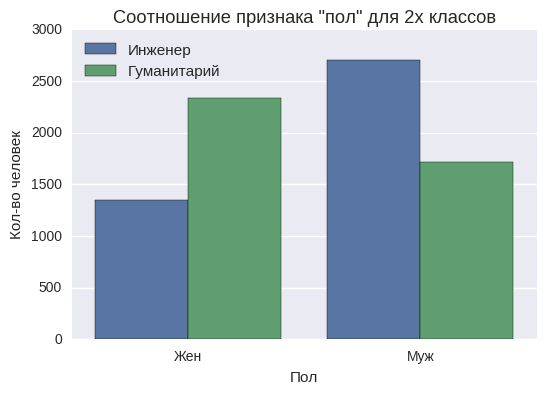

In [32]:
g = sns.countplot(x='sex', hue='is_gum',  data=users_df.drop(index_to_del))
sns.set(font_scale=1.1)

g.set_ylabel('Кол-во человек')
g.set_xlabel('Пол')

plt.xticks(range(2), ('Жен', 'Муж')) 

handles, labels = g.get_axes().get_legend_handles_labels()
g.get_axes().legend(handles, ['Инженер', 'Гуманитарий'], loc='upper left')
plt.title('Соотношение признака "пол" для 2х классов')

## Alcohol

In [33]:
alcohol_df = users_df.dropna(subset=['alcohol'])
alcohol_vc = alcohol_df.is_gum.value_counts()
alcohol_vc

1.0    1525
0.0    1510
Name: is_gum, dtype: int64

In [34]:
delta = alcohol_vc[1] - alcohol_vc[0]
delta

15

In [35]:
index_to_del = np.random.choice(alcohol_df[alcohol_df.is_gum == 1].index, delta, replace=False)
alcohol_df.drop(index_to_del, inplace=True)
alcohol_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1510
0.0    1510
Name: is_gum, dtype: int64

In [36]:
# замена местами компромисное и нейтральное
alcohol_df.loc[alcohol_df.alcohol == 3, 'alcohol'] = 6
alcohol_df.loc[alcohol_df.alcohol == 4, 'alcohol'] = 3
alcohol_df.loc[alcohol_df.alcohol == 6, 'alcohol'] = 4

/home/digitman/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


/home/digitman/anaconda3/lib/python3.5/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


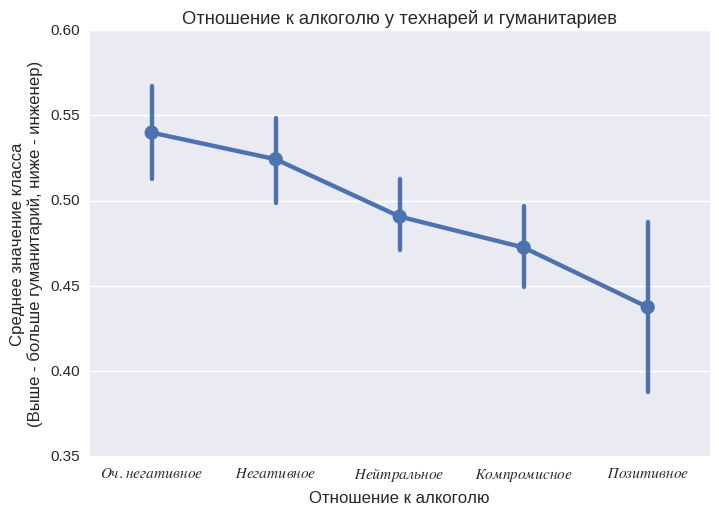

In [37]:
g = sns.pointplot(x="alcohol", y="is_gum", data=alcohol_df, ci=80) #, kind='swarm');

sns.set(font_scale=1.1)

g.set_xlabel('Отношение к алкоголю')
g.set_ylabel('Среднее значение класса\n(Выше - больше гуманитарий, ниже - инженер)')

plt.xticks(range(5), ('$Оч. негативное$', '$Негативное$', '$Нейтральное$', '$Компромисное$', '$Позитивное$')) 

handles, labels = g.get_axes().get_legend_handles_labels()
plt.title('Отношение к алкоголю у технарей и гуманитариев')

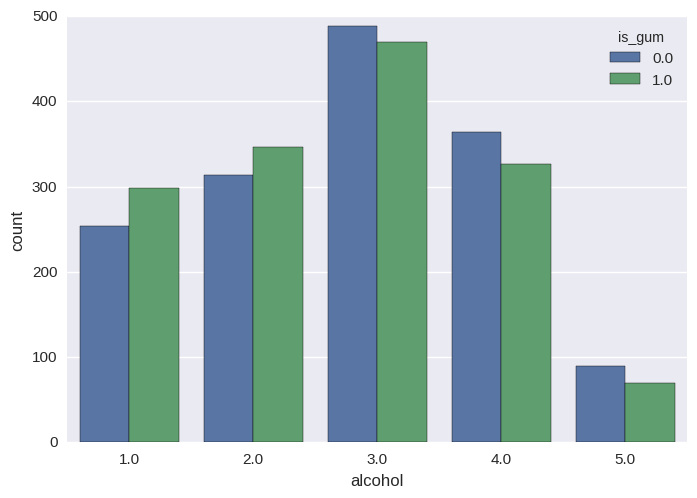

In [38]:
g = sns.countplot(x='alcohol', hue='is_gum',  data=alcohol_df)

## Smoking

In [39]:
smoking_df = users_df.dropna(subset=['smoking'])
smoking_vc = smoking_df.is_gum.value_counts()
smoking_vc

1.0    1591
0.0    1570
Name: is_gum, dtype: int64

In [40]:
delta = smoking_vc[1] - smoking_vc[0]
delta

21

In [41]:
index_to_del = np.random.choice(smoking_df[smoking_df.is_gum == 1].index, delta, replace=False)
smoking_df.drop(index_to_del, inplace=True)
smoking_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1570
0.0    1570
Name: is_gum, dtype: int64

In [42]:
# замена местами компромисное и нейтральное
smoking_df.loc[smoking_df.smoking == 3, 'smoking'] = 6
smoking_df.loc[smoking_df.smoking == 4, 'smoking'] = 3
smoking_df.loc[smoking_df.smoking == 6, 'smoking'] = 4

/home/digitman/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [44]:
# plt.xkcd()

/home/digitman/anaconda3/lib/python3.5/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


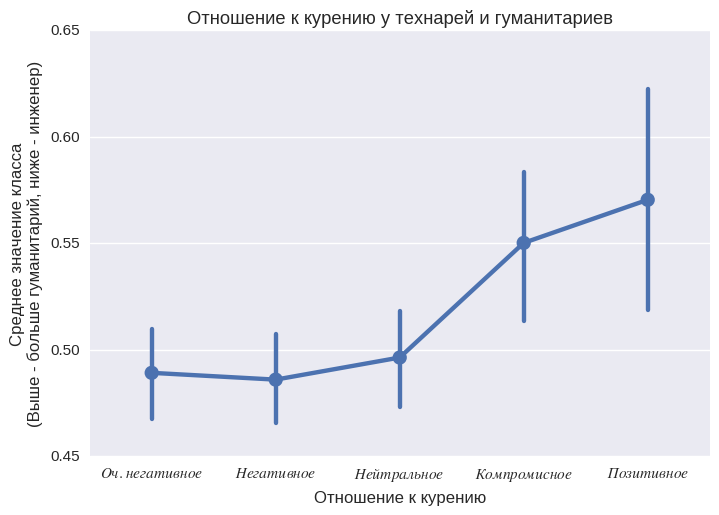

In [43]:
g = sns.pointplot(x="smoking", y="is_gum", data=smoking_df, ci=80) #, kind='swarm');

sns.set(font_scale=1.1)

g.set_xlabel('Отношение к курению')
g.set_ylabel('Среднее значение класса\n(Выше - больше гуманитарий, ниже - инженер)')

plt.xticks(range(5), ('$Оч. негативное$', '$Негативное$', '$Нейтральное$', '$Компромисное$', '$Позитивное$')) 

handles, labels = g.get_axes().get_legend_handles_labels()
plt.title('Отношение к курению у технарей и гуманитариев')

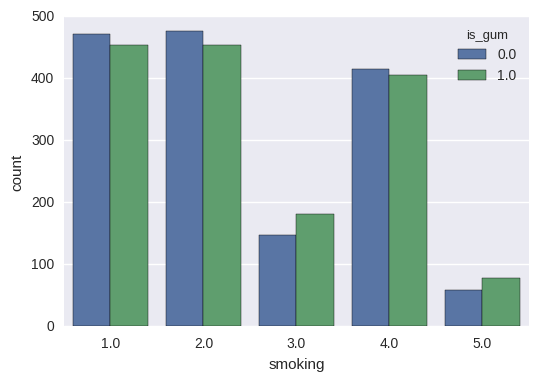

In [49]:
g = sns.countplot(x='smoking', hue='is_gum',  data=smoking_df)

## Political

In [46]:
political_df = users_df.dropna(subset=['political'])
political_vc = political_df.is_gum.value_counts()
political_vc

0.0    1518
1.0    1501
Name: is_gum, dtype: int64

In [47]:
delta = political_vc[0] - political_vc[1]
delta

17

In [48]:
index_to_del = np.random.choice(political_df[political_df.is_gum == 0].index, delta, replace=False)
political_df.drop(index_to_del, inplace=True)
political_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1501
0.0    1501
Name: is_gum, dtype: int64

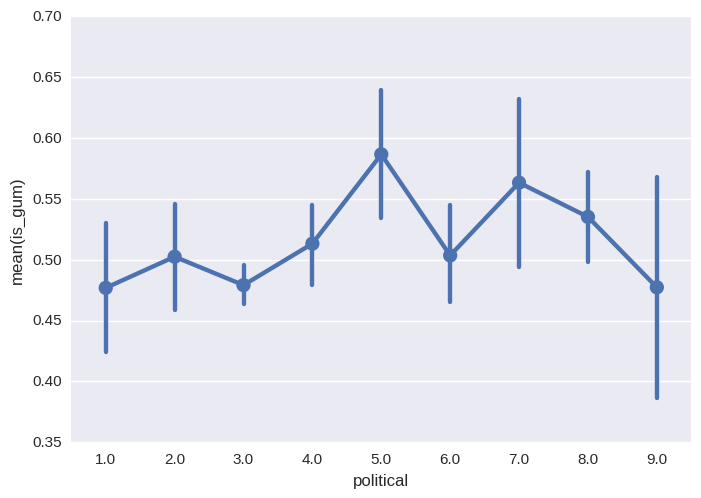

In [49]:
g = sns.pointplot(x="political", y="is_gum", data=political_df, ci=80) #, kind='swarm');

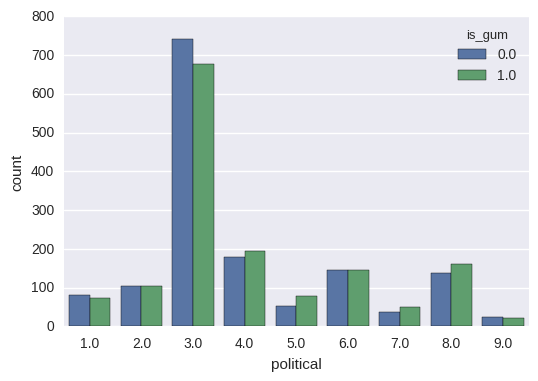

In [54]:
g = sns.countplot(x='political', hue='is_gum',  data=political_df)

## Relation

In [79]:
relation_df = users_df.dropna(subset=['relation'])
relation_vc = relation_df.is_gum.value_counts()
relation_vc

1.0    4126
0.0    4051
Name: is_gum, dtype: int64

In [80]:
delta = relation_vc[1] - relation_vc[0]
delta

75

In [81]:
index_to_del = np.random.choice(relation_df[relation_df.is_gum == 1].index, delta, replace=False)
relation_df.drop(index_to_del, inplace=True)
relation_df.is_gum.value_counts()

1.0    4051
0.0    4051
Name: is_gum, dtype: int64

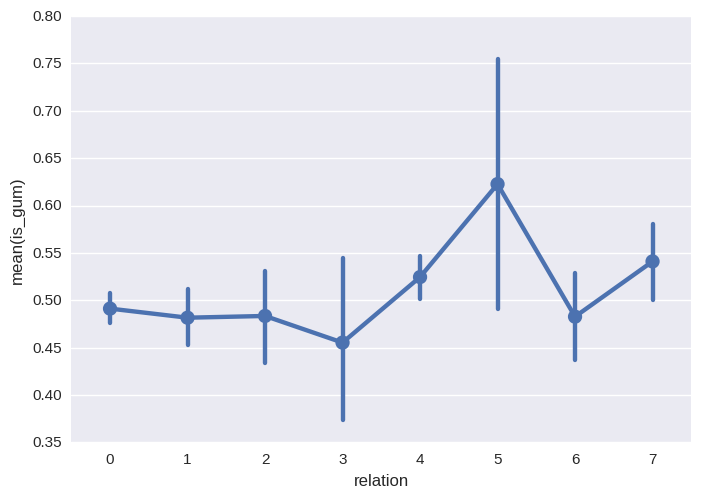

In [82]:
sns.pointplot(x="relation", y="is_gum", data=relation_df) #, kind='swarm');

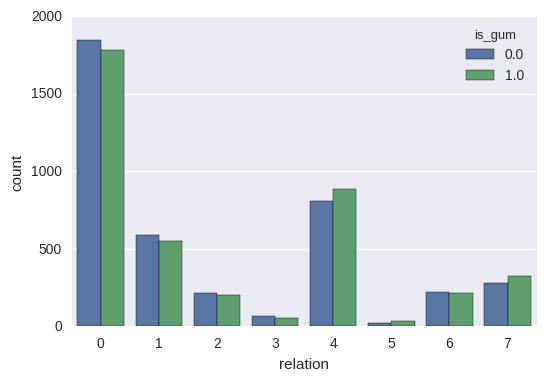

In [58]:
g = sns.countplot(x='relation', hue='is_gum',  data=relation_df)

## Life-main

In [83]:
life_main_df = users_df.dropna(subset=['life_main'])
life_main_vc = life_main_df.is_gum.value_counts()
life_main_vc

1.0    1620
0.0    1474
Name: is_gum, dtype: int64

In [84]:
delta = life_main_vc[1] - life_main_vc[0]
delta

146

In [85]:
index_to_del = np.random.choice(life_main_df[life_main_df.is_gum == 1].index, delta, replace=False)
life_main_df.drop(index_to_del, inplace=True)
life_main_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1474
0.0    1474
Name: is_gum, dtype: int64

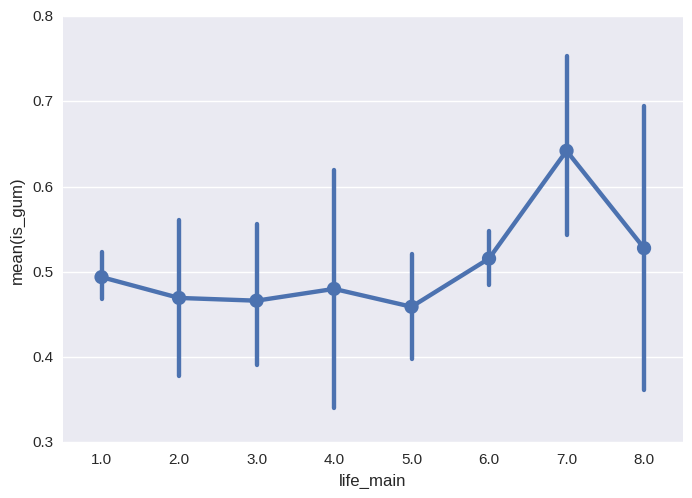

In [86]:
sns.pointplot(x="life_main", y="is_gum", data=life_main_df) #, kind='swarm');

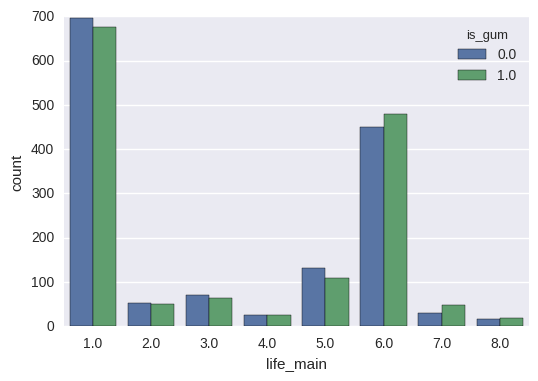

In [62]:
g = sns.countplot(x='life_main', hue='is_gum',  data=life_main_df)

## People-main

In [50]:
people_main_df = users_df.dropna(subset=['people_main'])
people_main_vc = people_main_df.is_gum.value_counts()
people_main_vc

1.0    1664
0.0    1546
Name: is_gum, dtype: int64

In [51]:
delta = people_main_vc[1] - people_main_vc[0]
delta

118

In [52]:
index_to_del = np.random.choice(people_main_df[people_main_df.is_gum == 1].index, delta, replace=False)
people_main_df.drop(index_to_del, inplace=True)
people_main_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1546
0.0    1546
Name: is_gum, dtype: int64

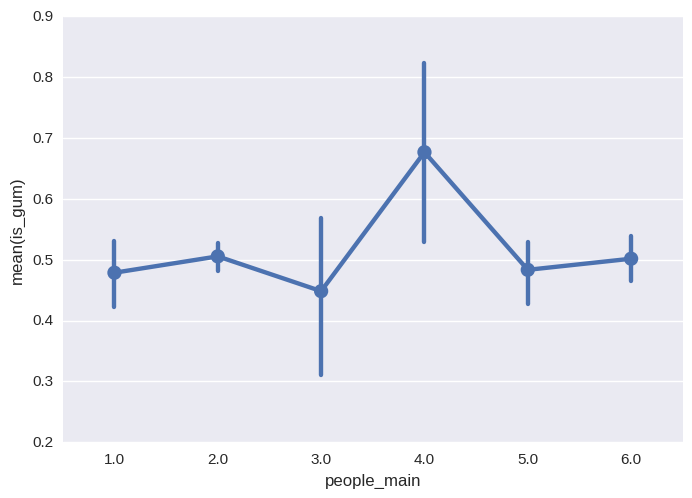

In [53]:
sns.pointplot(x="people_main", y="is_gum", data=people_main_df) #, kind='swarm');

In [54]:
people_main_df.people_main.value_counts()

2.0    1664
6.0     644
5.0     389
1.0     303
3.0      58
4.0      34
Name: people_main, dtype: int64

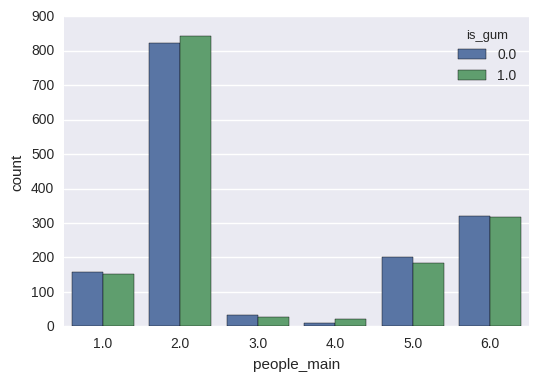

In [66]:
g = sns.countplot(x='people_main', hue='is_gum',  data=people_main_df)

## Month

In [67]:
users_df.bdate = pd.to_datetime(users_df.bdate, errors='coerce')

In [68]:
bdate_df = users_df.dropna(subset=['bdate'])

In [69]:
bdate_vc = bdate_df.is_gum.value_counts()
bdate_vc

0.0    2181
1.0    2146
Name: is_gum, dtype: int64

In [71]:
delta = bdate_vc[0] - bdate_vc[1]
delta

35

In [72]:
index_to_del = np.random.choice(bdate_df[bdate_df.is_gum == 0].index, delta, replace=False)
index_to_del.shape

(35,)

In [73]:
bdate_df.drop(index_to_del, inplace=True)
bdate_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0.0    2146
1.0    2146
Name: is_gum, dtype: int64

In [74]:
bdate_df['bmonth'] = bdate_df.bdate.apply(lambda x: x.month if x else x)

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


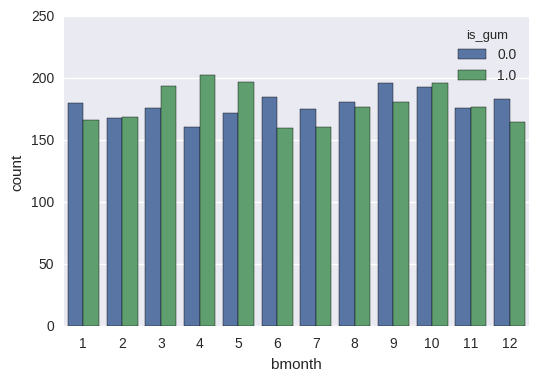

In [75]:
g = sns.countplot(x='bmonth', hue='is_gum',  data=bdate_df)

# Comments

In [57]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637605 entries, 0 to 2637604
Data columns (total 9 columns):
attachments     object
comment_id      int64
date            int64
from_id         int64
likes           int64
owner_id        object
reply_to_cid    object
reply_to_uid    object
text            object
dtypes: int64(4), object(5)
memory usage: 181.1+ MB


In [58]:
comments_merged = comments_df.merge(users_df[['id', 'is_gum', 'sex']], left_on='from_id', right_on='id', how='inner')

In [59]:
(comments_merged.from_id.value_counts() > 5).sum()

3053

### Generating hour from comment date

In [60]:
comments_merged['hour'] = comments_merged.date.apply(lambda x: datetime.fromtimestamp(x).hour)

In [61]:
comments_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193716 entries, 0 to 193715
Data columns (total 13 columns):
attachments     11104 non-null object
comment_id      193716 non-null int64
date            193716 non-null int64
from_id         193716 non-null int64
likes           193716 non-null int64
owner_id        193716 non-null object
reply_to_cid    0 non-null object
reply_to_uid    0 non-null object
text            193716 non-null object
id              193716 non-null int64
is_gum          193716 non-null float64
sex             193716 non-null int64
hour            193716 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 20.7+ MB


In [62]:
comments_merged.head()

,attachments,comment_id,date,from_id,likes,owner_id,reply_to_cid,reply_to_uid,text,id,is_gum,sex,hour
0,None,3343769,1481737910,9048238,1,-33041211,None,None,Вжух даже здесь,9048238,0.0,2,20
1,None,3272879,1478856041,9048238,3,-33041211,None,None,И пишите аккуратнее 😞,9048238,0.0,2,12
2,None,3210918,1475864318,9048238,0,-33041211,None,None,Это #имбрина 😏,9048238,0.0,2,21
3,None,1785419,1434244396,9048238,0,-33041211,None,None,3,9048238,0.0,2,4
4,None,1293387,1410276900,9048238,0,-33041211,None,None,на что фотографировали?,9048238,0.0,2,19


In [64]:
comments_merged.is_gum.value_counts()

0.0    102886
1.0     90830
Name: is_gum, dtype: int64

## Nice plot

In [65]:
comments_merged['Гумманитарий'] = comments_merged.is_gum

In [66]:
comments_merged.Гумманитарий = comments_merged.Гумманитарий.map({0: False, 1: True})

In [67]:
merged_vc = comments_merged.is_gum.value_counts()
merged_vc

0.0    102886
1.0     90830
Name: is_gum, dtype: int64

In [68]:
delta = merged_vc[0] - merged_vc[1]
delta

12056

In [69]:
index_to_del = np.random.choice(comments_merged[comments_merged.is_gum == 0].index, delta, replace=False)

In [70]:
merged_ = comments_merged.drop(index_to_del)
merged_.is_gum.value_counts()

1.0    90830
0.0    90830
Name: is_gum, dtype: int64

In [71]:
%matplotlib inline

/home/digitman/anaconda3/lib/python3.5/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


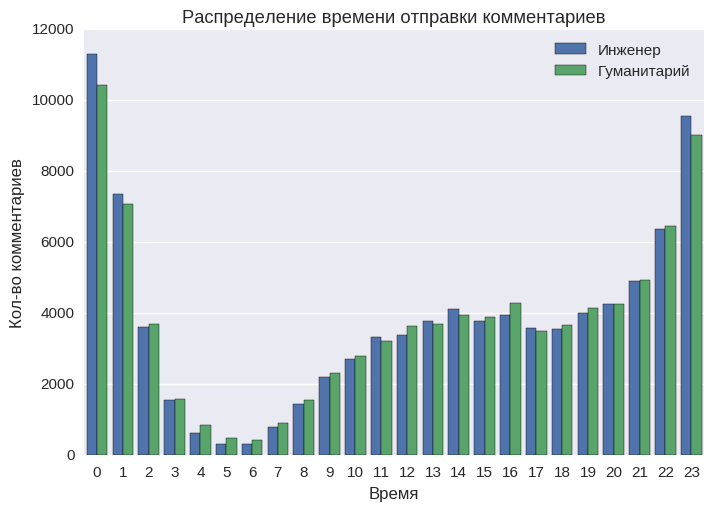

In [79]:
sns.set(font_scale=1.1)
g = sns.countplot(x='hour', hue='Гумманитарий', data=merged_, saturation=0.9)
g.set_ylabel('Кол-во комментариев')
g.set_xlabel('Время')
plt.title('Распределение времени отправки комментариев')

handles, labels = g.get_axes().get_legend_handles_labels()
g.get_axes().legend(handles, ['Инженер', 'Гуманитарий']) #, loc='upper left')

## Another

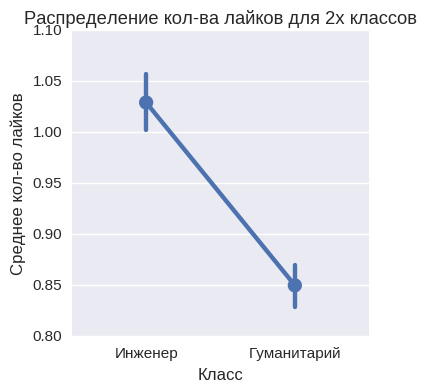

In [86]:
g = sns.factorplot(x='is_gum', y='likes', data=merged_)
sns.set(font_scale=1.1)

g.set_xlabels('Класс')
g.set_ylabels('Среднее кол-во лайков')
plt.title('Распределение кол-ва лайков для 2х классов')

plt.xticks(range(2), ('Инженер', 'Гуманитарий'));

## Saving

In [100]:
index_to_del = comments_merged[comments_merged.text == ''].index
comments_merged.drop(index_to_del, inplace=True)
comments_merged.shape

(185612, 14)

In [101]:
comments_merged[['from_id', 'text', 'is_gum', 'hour', 'likes', 'sex']].to_csv('data/comments_vrn.csv.gz',
                                                                       index=False, compression='gzip')